In [1]:
from music21 import *

# TESTING: Generating Harmonic Structure for Bach Chorales

The following function can be used to take any musescore or musicxml file, condense it into chord structure, and generate the harmonic analysis so that we can use it for figuring out what to compare for my honors thesis.

In [2]:
def generate_chord_progressions(score):
    # generate the chords
    score_chords = score.chordify()
    score_chords.partName = 'Chords'
    score_chords.id = 'Chords'

    # put the chords in closed position
    for c in score_chords.recurse().getElementsByClass(chord.Chord):
        c.closedPosition(forceOctave=4, inPlace=True)

    # generate the roman numeral analysis for each chord
    for c in score_chords.recurse().getElementsByClass(chord.Chord):
        if c.beat.is_integer():
            rn = roman.romanNumeralFromChord(c, score.analyze('key'))
            c.addLyric(str(rn.figure))

    score.insert(0, score_chords)

Now each of the following code cells will generate the harmony for ONE of the AI generations. Starting with Chorale 20 and then will expand from there as I get more music for the project.

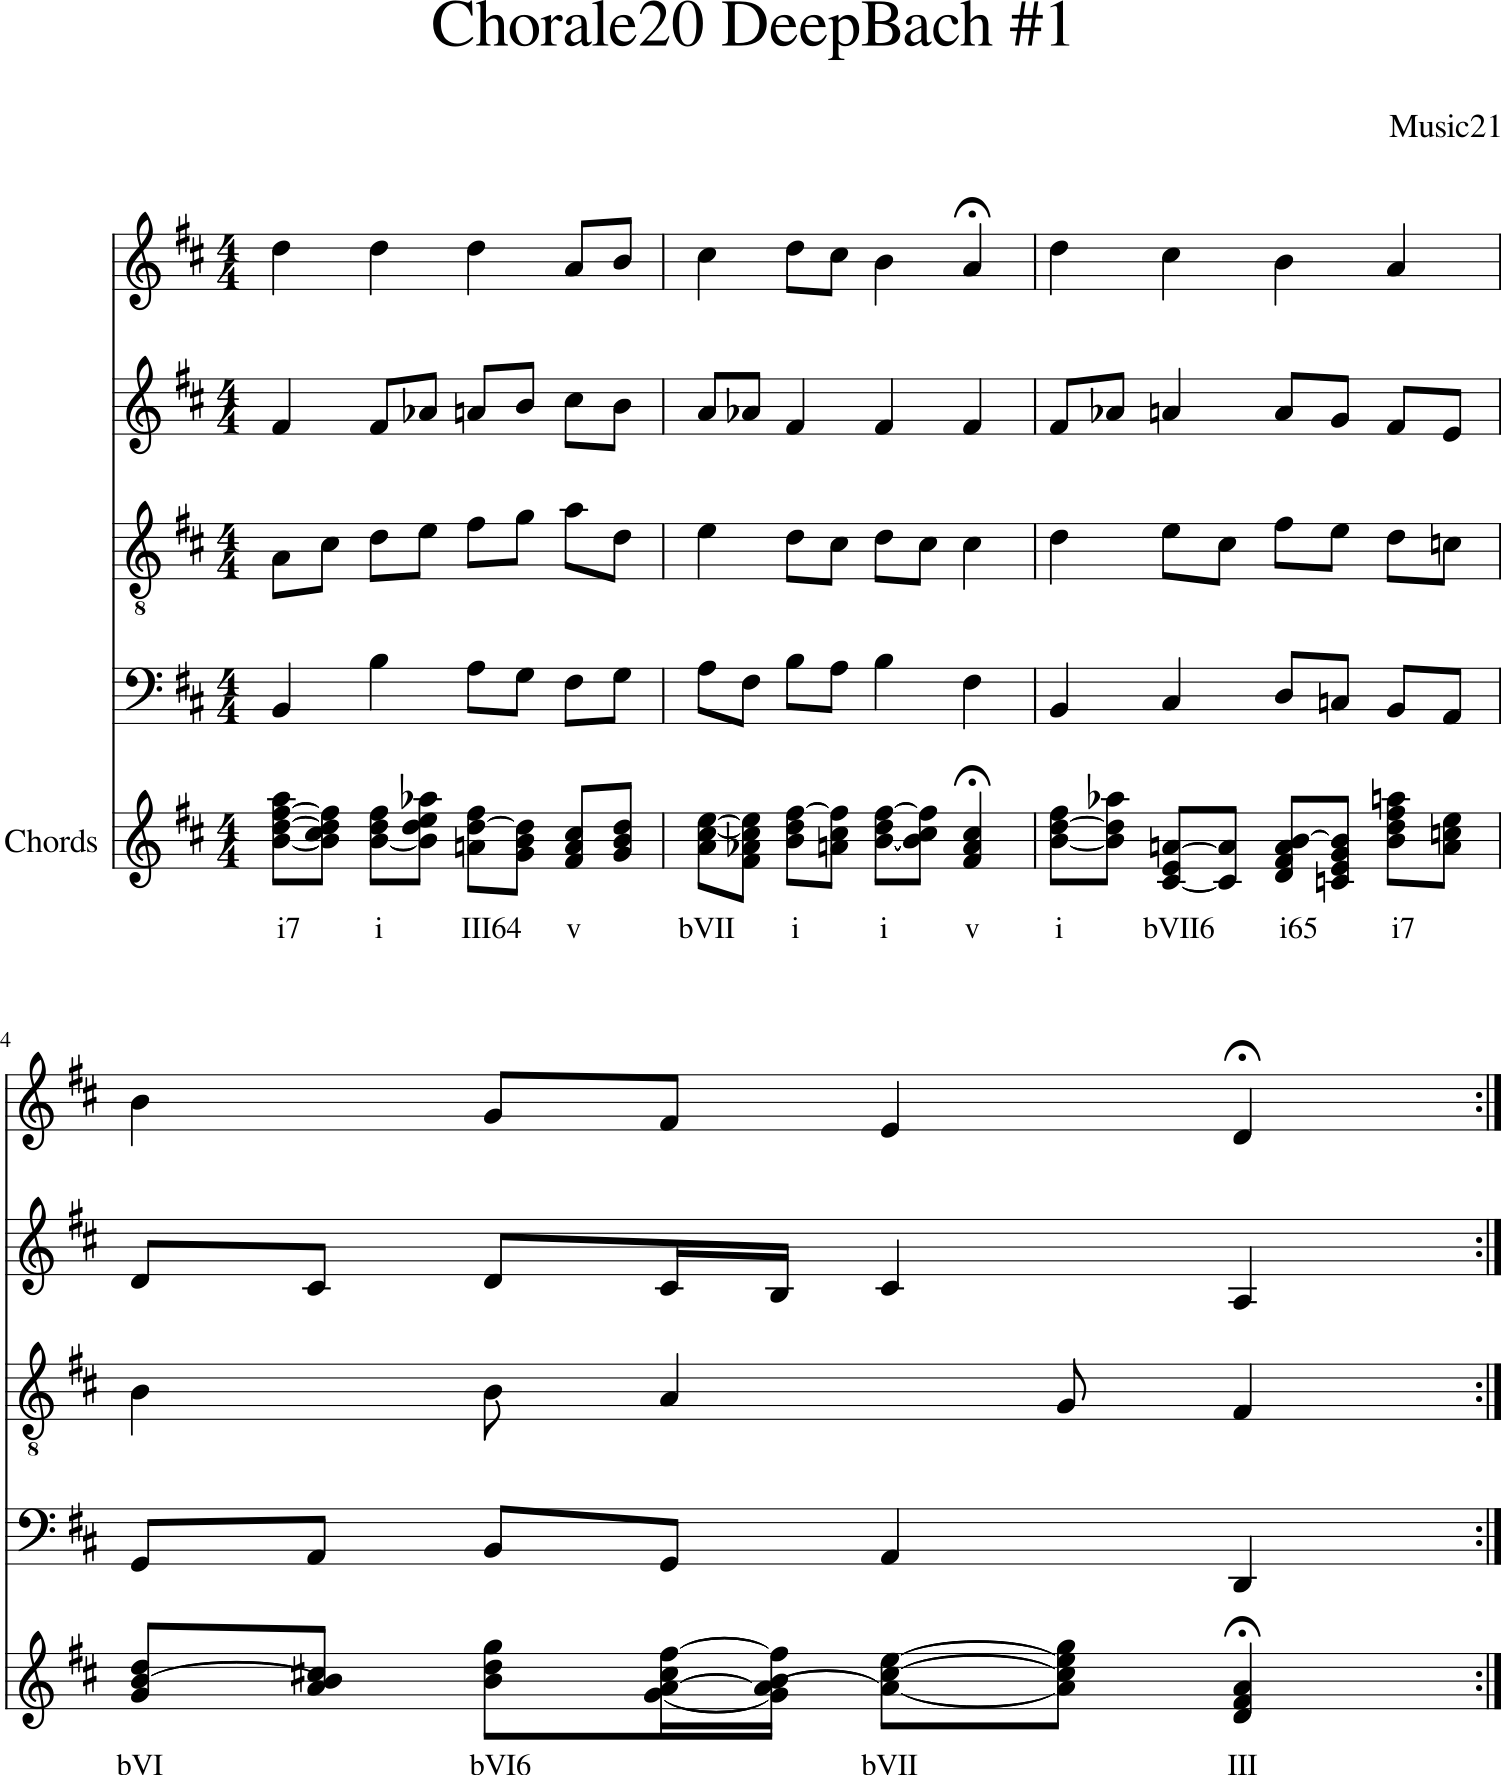

In [3]:
ai_1 = converter.parse('./BWV302/BWV302_DeepBach1.mxl')
generate_chord_progressions(ai_1)
ai_1.measures(0,4).show()
# ai_1.write('musicxml.pdf', fp='./Chorale20/Chorale20_DeepBach1.pdf')

## MORE TESTING: Pulling Out Piano Parts

I need to be able to create piano parts that are more easily playable by a pianist.

In [ ]:
def generate_piano_part(score):
    # generate the chords
    score_chords = score.chordify()
    score_chords.partName = 'Chords'
    score_chords.id = 'Chords'

    # figure out the keySignature
    if score.analyze('key').alteredPitches[0].accidental.name == 'sharp':
        key_sig = key.KeySignature(len(score.analyze('key').alteredPitches))
    elif score.analyze('key').alteredPitches[0].accidental.name == 'flat':
        key_sig = key.KeySignature(len(score.analyze('key').alteredPitches) * -1)
    else:
        key_sig = key.KeySignature(0)

    treble_part = stream.Part()
    treble_part.partName = 'Piano'
    treble_part.insert(0, key_sig)
    bass_part = stream.Part()
    bass_part.partName = 'Piano'
    bass_part.insert(0, key_sig)

    # generate the roman numeral analysis for each chord
    for c in score_chords.recurse().getElementsByClass(chord.Chord):
        treble_notes = [note.Note(p) for p in c.pitches[2:]]
        bass_notes = [note.Note(p) for p in c.pitches[:2]]

        # create treble and bass chords
        treble_chord = chord.Chord(treble_notes, duration=c.duration)
        bass_chord = chord.Chord(bass_notes, duration=c.duration)

        # append to the corresponding part
        treble_part.append(treble_chord)
        bass_part.append(bass_chord)

    # append to the original score
    score.insert(0, treble_part)
    score.insert(0, bass_part)

In [ ]:
from music21 import *

ai_1 = converter.parse('BWV244_17_FINAL_SCORE.mxl')
generate_piano_part(ai_1)
# print(len(ai_1.analyze('key').alteredPitches))
ai_1.show()
ai_1.write('musicxml.pdf', fp='example3.pdf')

### Another Piano Reduction Algorithm

In [1]:
from music21 import *

# save all the parts to variables
bwv302 = converter.parse('bwv302.mxl')
soprano = bwv302.parts[0]
alto = bwv302.parts[1]
tenor = bwv302.parts[2]
bass = bwv302.parts[3]

# combine the soprano and alto parts
sa_part = stream.Part()
sa_part.id = 'Piano (RH)'
sa_part.append(soprano)
sa_part.append(alto)

# combine the tenor and bass parts
tb_part = stream.Part()
tb_part.id = 'Piano (LH)'
tb_part.append(tenor)
tb_part.append(bass)

# insert these into the original score
bwv302.insert(0, sa_part)
bwv302.insert(0, tb_part)

bwv302.write('musicxml.pdf', fp='test1.pdf')

KeyError: 127652382098672